In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [13]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Дата          301355 non-null  datetime64[ns]
 1   Склад         301355 non-null  int64         
 2   Контрагент    301355 non-null  object        
 3   Номенклатура  301355 non-null  object        
 4   Количество    301355 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.5+ MB


Сразу переведем столбец "Дата" в правильный формат

In [4]:

df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')

print(df['Дата'].head())
print(df.dtypes)


0   2018-01-04
1   2018-01-04
2   2018-01-04
3   2018-01-04
4   2018-01-04
Name: Дата, dtype: datetime64[ns]
Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object


Сгруппируйте данные по дате, посчитайте количество продаж

In [7]:
grouped_df = df.groupby('Дата').size().reset_index(name='Количество_продаж')


Вывести несколько первых строк сгруппированных данных

In [6]:
print(grouped_df.head())

        Дата  Количество_продаж
0 2018-01-04               1840
1 2018-01-05               1301
2 2018-01-06               1306
3 2018-01-07               1322
4 2018-01-09               1719


Нарисуйте график продаж у `grouped_df`

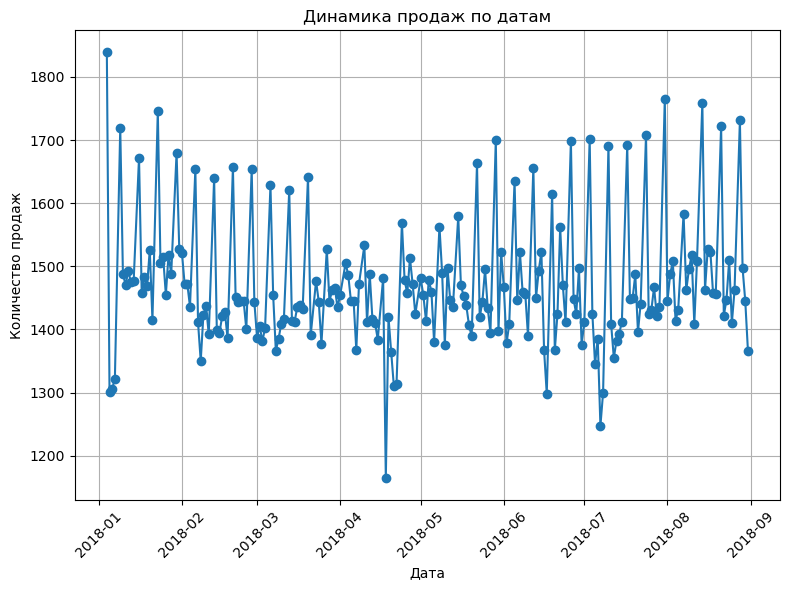

In [9]:
import matplotlib.pyplot as plt

# Строим график
plt.figure(figsize=(8, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество_продаж'], marker='o', linestyle='-')

# Добавляем подписи
plt.title('Динамика продаж по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Показываем график
plt.show()


Опишите что вы видите на графике. Ваша задача - максимально описать график

In [ ]:
На графике видно, как менялось количество продаж по дням. В некоторые даты продажи были высокими — это может говорить о том, что в те дни был повышенный
спрос, возможно, проходила акция или реклама. В другие дни, наоборот, наблюдается спад — возможно, это выходные, праздники или просто периоды 
низкой активности.

Линия графика местами идёт вверх — значит, продажи росли. В других местах она снижается — это может быть сигналом, что интерес к продукту падал. 
Если график выглядит волнообразно, это может говорить о сезонности или повторяющихся циклах — например, люди чаще покупают в определённые дни недели.

Если есть резкие скачки вверх или вниз, стоит обратить внимание на эти даты — они могут быть важными для бизнеса.
В целом, график помогает понять, когда продажи были сильными, а когда — слабее, и даёт возможность принимать более точные решения:
когда запускать рекламу, когда усиливать команду, и как планировать запасы.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [16]:

Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['Количество'] < lower_bound) | (df['Количество'] > upper_bound)]

if not outliers.empty:
    max_outlier_row = outliers.loc[outliers['Количество'].idxmax()]
    print("Строка с максимальным выбросом по количеству продаж:")
    print(max_outlier_row)
else:
    print("Выбросов по количеству продаж не найдено.")


Строка с максимальным выбросом по количеству продаж:
Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [18]:

df['Дата'] = pd.to_datetime(df['Дата'])

df_filtered = df[df['Склад'] == 3]

df_filtered = df_filtered[df_filtered['Дата'].dt.month.isin([6, 7, 8])]

df_filtered = df_filtered[df_filtered['Дата'].dt.dayofweek == 2]

top_product = (
    df_filtered.groupby('Номенклатура')['Количество']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

print("Топовый товар по продажам по средам летом на складе №3:")
print(top_product.iloc[0])


Топовый товар по продажам по средам летом на складе №3:
Номенклатура    product_1
Количество           2267
Name: 0, dtype: object


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [47]:

weather_df = pd.read_csv("astana_weather.csv", sep=";", encoding="utf-8", skiprows=6)

# Преобразуем столбец времени и температуру
weather_df["Дата"] = pd.to_datetime(weather_df["Местное время в Астане"]).dt.date
weather_df["T"] = pd.to_numeric(weather_df["T"], errors="coerce")

# Группируем по дате и считаем среднюю температуру
daily_temp = weather_df.groupby("Дата")["T"].mean().reset_index()


In [48]:

# Преобразуем оба столбца к datetime64[ns]
daily_temp["Дата"] = pd.to_datetime(daily_temp["Дата"])
grouped_df["Дата"] = pd.to_datetime(grouped_df["Дата"])

# Теперь объединяем
merged_df = pd.merge(grouped_df, daily_temp, on="Дата", how="left")



In [49]:
# Группируем исходные данные по дате
grouped_df = df.groupby("Дата")["Количество"].sum().reset_index()
grouped_df.rename(columns={"Количество": "Количество продаж"}, inplace=True)


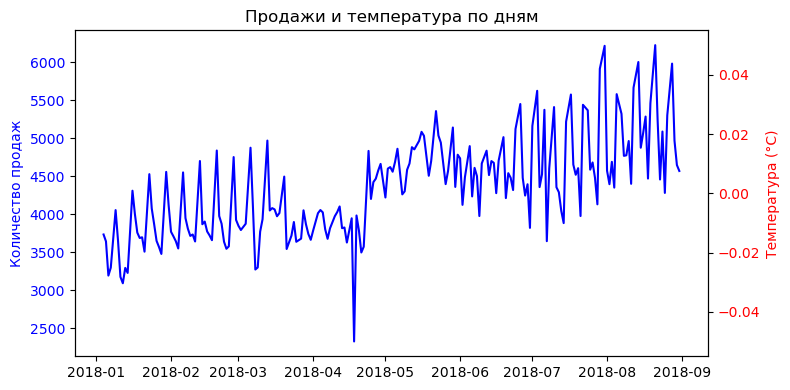

In [50]:

fig, ax1 = plt.subplots(figsize=(8, 4))

# Продажи
ax1.plot(merged_df["Дата"], merged_df["Количество продаж"], color="blue", label="Количество продаж")
ax1.set_ylabel("Количество продаж", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Температура
ax2 = ax1.twinx()
ax2.plot(merged_df["Дата"], merged_df["T"], color="red", label="Температура")
ax2.set_ylabel("Температура (°C)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Продажи и температура по дням")
fig.tight_layout()
plt.show()
